In [205]:
#Importing the necessary Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [206]:
STI=pd.read_csv("Medic Survey(Sexually Transmitted Infection) (Responses).csv")
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,\nLikelihood of Using SHE Platform,\nSHE Adequacy,\r\nPreferred Topics,\r\n\r\nImportance of Anonymous STI Info,\nKey Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,\r\nUnaddressed SH Topics/Questions
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None


# DATA PREPROCESSING AND CLEANING

In [207]:
#checking for the column names 
columns=STI.columns

In [208]:
#checking the shape
STI.shape

(175, 15)

In [209]:
# Remove unwanted characters from column names
STI.columns = STI.columns.str.replace('\\', '').str.replace('\n', '').str.replace('\r', '')
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None


In [210]:
# Extracting year, month, and day
STI['YEAR'] =  pd.to_datetime(STI['Timestamp']).dt.year
STI['MONTH'] = pd.to_datetime(STI['Timestamp']).dt.month
STI['DAY'] = pd.to_datetime(STI['Timestamp']).dt.day


In [211]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None,2024,3,18
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27


In [212]:
#checking for the null values
STI.isna().sum()

Timestamp                                    0
Time                                         0
Sources of STI Information                   0
Confidence in STI Knowledge                  0
Likelihood of Using SHE Platform             0
SHE Adequacy                                 0
Preferred Topics                             0
Importance of Anonymous STI Info             0
Key Features in SHE Platform                 0
Likelihood of Using SHE Platform             0
Comfort Level Using Anonymous SH Platform    0
Age range                                    0
Gender                                       0
Connection on Platform                       0
Unaddressed SH Topics/Questions              1
YEAR                                         0
MONTH                                        0
DAY                                          0
dtype: int64

In [213]:
#Dropping the null value
# Dropping null values from the 'Unaddressed SH Topics/Questions' column
STI.dropna(subset=['Unaddressed SH Topics/Questions'], inplace=True)

In [214]:
#Rechecking if the null values have been filled up
STI.isna().sum()

Timestamp                                    0
Time                                         0
Sources of STI Information                   0
Confidence in STI Knowledge                  0
Likelihood of Using SHE Platform             0
SHE Adequacy                                 0
Preferred Topics                             0
Importance of Anonymous STI Info             0
Key Features in SHE Platform                 0
Likelihood of Using SHE Platform             0
Comfort Level Using Anonymous SH Platform    0
Age range                                    0
Gender                                       0
Connection on Platform                       0
Unaddressed SH Topics/Questions              0
YEAR                                         0
MONTH                                        0
DAY                                          0
dtype: int64

In [215]:
# Extracting the lower bound of the age range
STI['lower Age'] = STI['Age range'].str.split(' - ').str[0].astype(int)
#Extracting the lower bound of the age range
STI['Upper Age'] = STI['Age range'].str.split(' - ').str[1].astype(int)

In [216]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


In [217]:
#checking for the statiscal sumart of the data
STI.describe()

,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Importance of Anonymous STI Info,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,YEAR,MONTH,DAY,lower Age,Upper Age
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.0,174.000000,174.000000,174.000000
mean,3.402299,3.965517,3.465517,3.942529,3.816092,4.017241,2024.0,3.0,19.896552,25.683908,34.402299
std,1.320884,1.201620,1.224257,1.219839,1.235587,1.180154,0.0,0.0,1.543470,8.829671,9.146160
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.0,3.0,18.000000,16.000000,24.000000
25%,2.250000,3.000000,3.000000,3.000000,3.000000,3.000000,2024.0,3.0,19.000000,16.000000,24.000000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2024.0,3.0,20.000000,25.000000,34.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024.0,3.0,20.000000,25.000000,34.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024.0,3.0,27.000000,55.000000,64.000000


In [218]:
#checking for the content of the data
STI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 174
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  174 non-null    object
 1   Time                                       174 non-null    object
 2   Sources of STI Information                 174 non-null    object
 3   Confidence in STI Knowledge                174 non-null    int64 
 4   Likelihood of Using SHE Platform           174 non-null    int64 
 5   SHE Adequacy                               174 non-null    int64 
 6   Preferred Topics                           174 non-null    object
 7   Importance of Anonymous STI Info           174 non-null    int64 
 8   Key Features in SHE Platform               174 non-null    object
 9   Likelihood of Using SHE Platform           174 non-null    int64 
 10  Comfort Level Using Anonymous SH Platf

In [219]:
#checking for any duplicate value in the dataset
STI.duplicated().sum()

0

In [220]:
#checking for the unique values
STI.nunique()

Timestamp                                      8
Time                                         173
Sources of STI Information                    30
Confidence in STI Knowledge                    5
Likelihood of Using SHE Platform               5
SHE Adequacy                                   5
Preferred Topics                              18
Importance of Anonymous STI Info               5
Key Features in SHE Platform                  81
Likelihood of Using SHE Platform               5
Comfort Level Using Anonymous SH Platform      5
Age range                                      5
Gender                                         3
Connection on Platform                        15
Unaddressed SH Topics/Questions              150
YEAR                                           1
MONTH                                          1
DAY                                            8
lower Age                                      5
Upper Age                                      5
dtype: int64

In [221]:
#rechecking the shape
STI.shape

(174, 20)

In [222]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


# Exploratory Data/Survey Analysis Based On the Responses

1)

In [223]:
# Usind the Groupby method to get the most preferred Topics
# Splitting the 'Preferred Topics' column into separate entries
preferred_topics = STI['Preferred Topics'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_topics = preferred_topics.explode()

# Grouping by topics and counting occurrences
topic_counts = stacked_topics.groupby(stacked_topics).size().reset_index(name='count')

# Displaying the frequency of each topic
topic_counts

,Preferred Topics,count
0,Communication with partners and maintaining he...,118
1,STI prevention,100
2,STI testing,43
3,STI treatment,69
4,others(specify),14


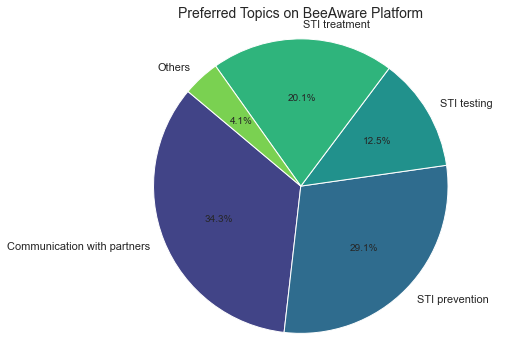

In [224]:
from matplotlib.colors import ListedColormap
# Data
topics = ["Communication with partners", "STI prevention", "STI testing", "STI treatment", "Others"]
counts = [118, 100, 43, 69, 14]

# Create a custom colormap with different shades of viridis
cmap = ListedColormap(plt.cm.viridis(np.linspace(0.2, 0.8, len(topics))))

# Create pie chart with custom colormap
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140, colors=cmap.colors)

# Adding title
plt.title('Preferred Topics on BeeAware Platform', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


2)

In [225]:
# Using the Groupby method to get the most ocurrences of Key Features in SHE Platform
# Splitting the 'Preferred Topics' column into separate entries
Key_Features = STI['Key Features in SHE Platform'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_topics = Key_Features.explode()

# Grouping by topics and counting occurrences
Key_Features_counts = stacked_topics.groupby(stacked_topics).size().reset_index(name='count')

# Displaying the frequency of each topic
Key_Features_counts

,Key Features in SHE Platform,count
0,Anonymous forums/chat rooms,77
1,Directory of STI testing locations,60
2,Informative articles,100
3,Interactive quizzes/games,42
4,Q&A with healthcare professionals,112
5,Support groups,65
6,Telehealth consultations,61
7,Videos,76


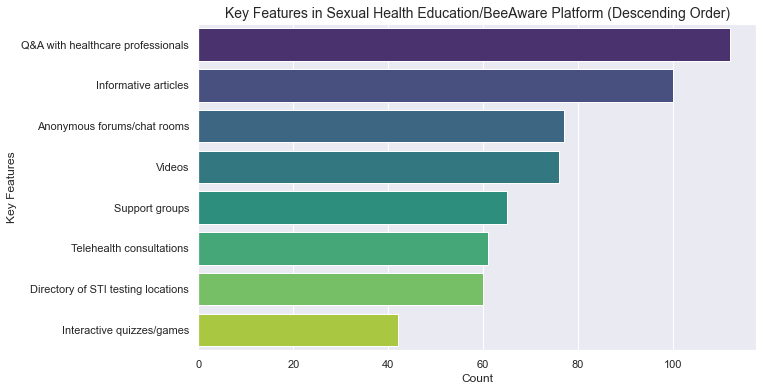

In [226]:
# Sorting the DataFrame by count in descending order
Key_Features_counts_sorted = Key_Features_counts.sort_values(by='count', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Key Features in SHE Platform', data=Key_Features_counts_sorted, palette='viridis')

# Adding labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Key Features', fontsize=12)
plt.title('Key Features in Sexual Health Education/BeeAware Platform (Descending Order)', fontsize=14)

# Show plot
plt.show()


In [227]:
# Using the Groupby method to get the most ocurrences of Sources of STI Information
# Splitting the 'Preferred Topics' column into separate entries
INFO_Features = STI['Sources of STI Information'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_INFO = INFO_Features.explode()

# Grouping by topics and counting occurrences
INFO_Features_counts = stacked_INFO.groupby(stacked_INFO).size().reset_index(name='count')

# Displaying the frequency of each topic
INFO_Features_counts

,Sources of STI Information,count
0,friends,54
1,medical practitioners,83
2,others(specify),18
3,school(sex education class),50
4,social media,81
5,websites,88


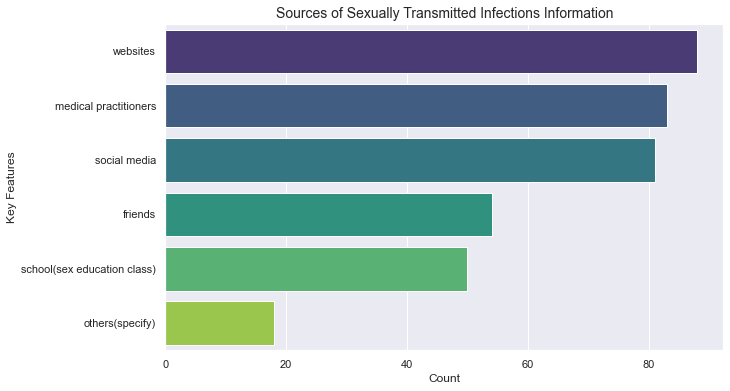

In [228]:
# Sorting the DataFrame by count in descending order
INFO_Features_counts_sorted = INFO_Features_counts.sort_values(by='count', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Sources of STI Information', data=INFO_Features_counts_sorted, palette='viridis')

# Adding labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Key Features', fontsize=12)
plt.title('Sources of Sexually Transmitted Infections Information', fontsize=14)

# Show plot
plt.show()

In [229]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


4)

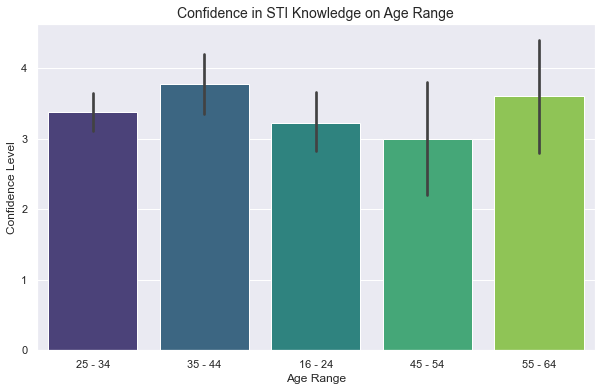

In [230]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Age range", y="Confidence in STI Knowledge",data = STI ,palette='viridis')

# Adding labels and title
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Confidence Level', fontsize=12)
plt.title('Confidence in STI Knowledge on Age Range', fontsize=14)

# Show plot
plt.show()


5)

In [231]:
# Using the Groupby method to get the most ocurrences of Connection on Platform
# Splitting the 'Preferred Topics' column into separate entries
Connection_Features = STI['Connection on Platform'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_connection = Connection_Features.explode()

# Grouping by topics and counting occurrences
connection_Features_counts =stacked_connection .groupby(stacked_connection).size().reset_index(name='count')

# Displaying the frequency of each topic
connection_Features_counts

,Connection on Platform,count
0,Anonymous forums,94
1,Interactive quizzes/games,54
2,Moderated chat rooms,85
3,Private messaging),65


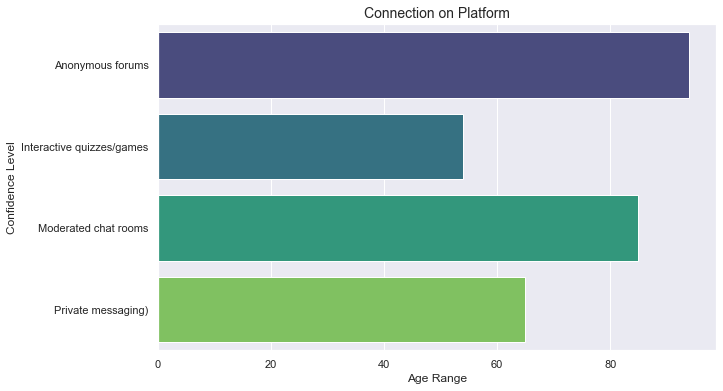

In [232]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="Connection on Platform",data =connection_Features_counts ,palette='viridis')

# Adding labels and title
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Confidence Level', fontsize=12)
plt.title('Connection on Platform', fontsize=14)

# Show plot
plt.show()

5)

In [233]:
# Using the Groupby method to get the most ocurrences of 
# Splitting the 'Preferred Topics' column into separate entries
Unaddressed_Features = STI['Unaddressed SH Topics/Questions'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
Unaddressed_stacked = Unaddressed_Features.explode()

# Grouping by topics and counting occurrences Unaddressed SH Topics/Questions
Unaddressed_Features_counts = Unaddressed_stacked.groupby(Unaddressed_stacked).size().reset_index(name='count')

# Displaying the frequency of each topic
Unaddressed_Features_counts

,Unaddressed SH Topics/Questions,count
0,,1
1,.,1
2,1. The Place and importance of Sexual relation...,1
3,2,1
4,A,1
...,...,...
153,safety and freedom from discretion violence,1
154,safety and freedom from discrimination and vio...,2
155,sexual orientation and sexual harassment borde...,1
156,signs and symptoms,1


In [237]:
#Top 20 Unaddressed SH Topics/Questions by count
most_unadressed_questions=Unaddressed_Features_counts.nlargest(10,"count")
most_unadressed_questions

,Unaddressed SH Topics/Questions,count
66,None,15
64,Non,4
67,None,4
85,STI,3
89,STI testing,2
101,Sexual health is about well-being,2
136,Treatment,2
149,not merely the absence of disease. Sexual heal...,2
154,safety and freedom from discrimination and vio...,2
0,,1


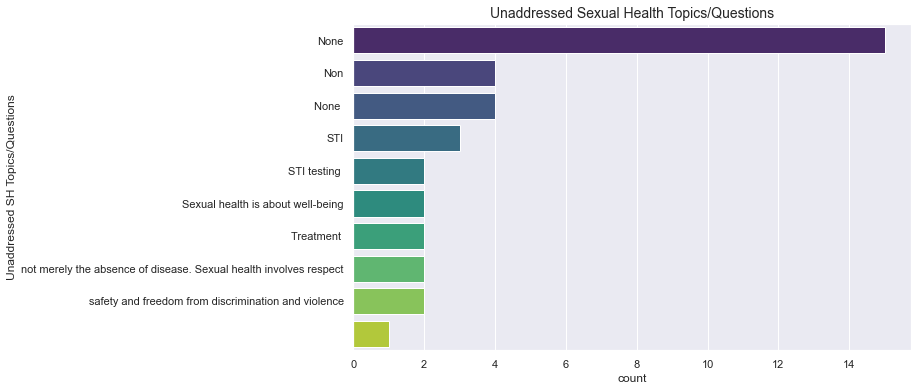

In [238]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="Unaddressed SH Topics/Questions",data =most_unadressed_questions ,palette='viridis')

# Adding labels and title
plt.xlabel('count', fontsize=12)
plt.ylabel('Unaddressed SH Topics/Questions', fontsize=12)
plt.title('Unaddressed Sexual Health Topics/Questions', fontsize=14)

# Show plot
plt.show()

In [239]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


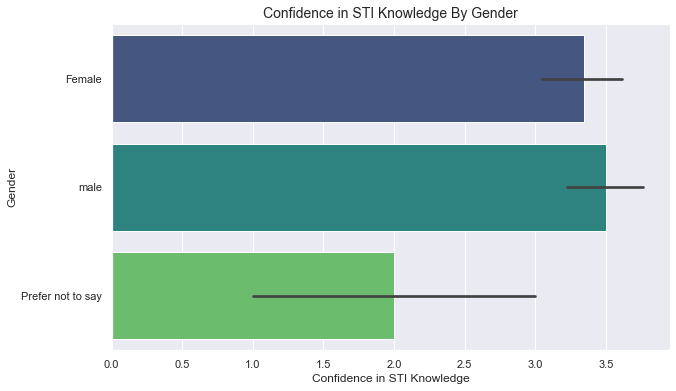

In [241]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Confidence in STI Knowledge", y="Gender",data = STI ,palette='viridis')

# Adding labels and title
plt.xlabel('Confidence in STI Knowledge', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Confidence in STI Knowledge By Gender', fontsize=14)

# Show plot
plt.show()